Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Preprocessing

In [3]:
# loading the data to pandas dataframe
heart_data = pd.read_csv('/content/Project 9 Heart Disease Data.csv')

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# rows and colums
heart_data.shape

(303, 14)

In [7]:
# getting some info
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#checking the missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# stastical measure
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<ipython-input-13-3e69c21fe9d9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['age'])


<Axes: xlabel='age', ylabel='Density'>

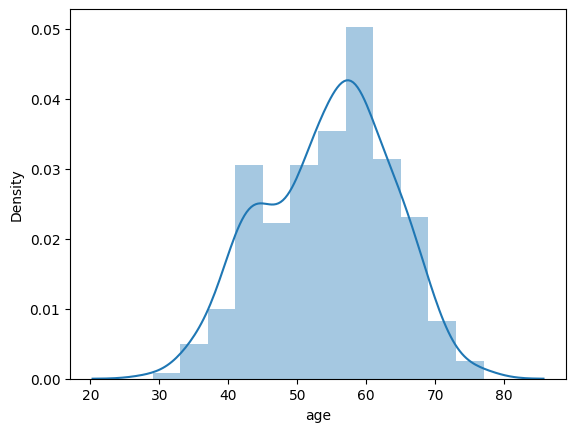

In [13]:
#distribution plot
sns.distplot(heart_data['age'])

<Axes: xlabel='sex', ylabel='count'>

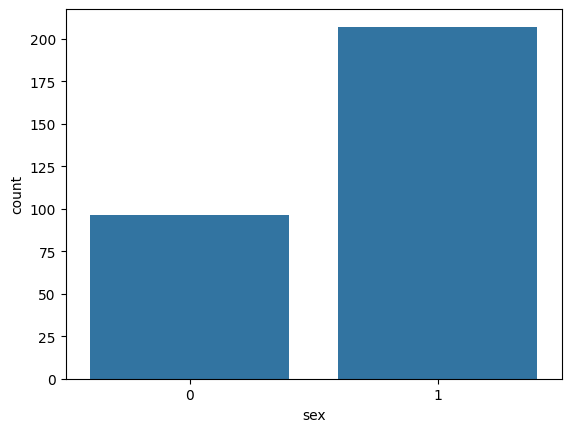

In [11]:
#checking sex ratio
sns.countplot(x='sex',data=heart_data)

<Axes: xlabel='cp', ylabel='count'>

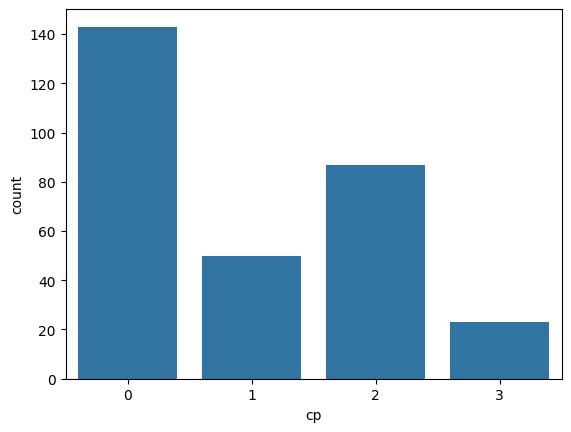

In [12]:
#checking chest pain types
sns.countplot(x='cp',data=heart_data)

<Axes: xlabel='trestbps', ylabel='Count'>

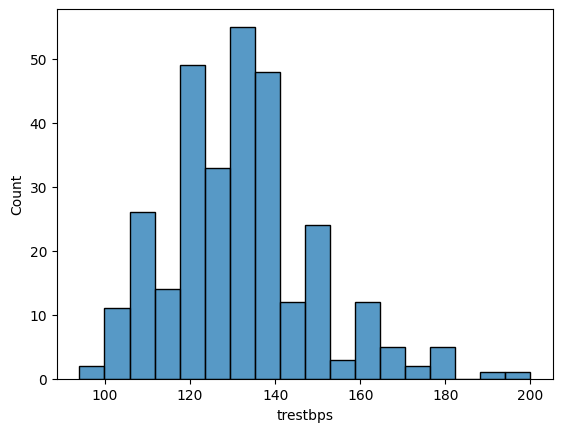

In [15]:
#distribution plot
sns.histplot(heart_data['trestbps'])

<ipython-input-16-eecd853ba703>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['chol'])


<Axes: xlabel='chol', ylabel='Density'>

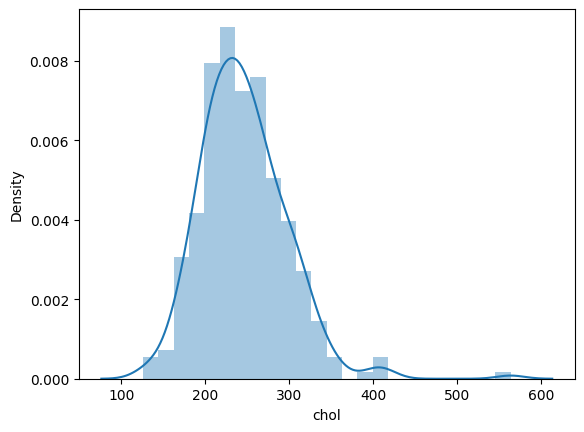

In [16]:
#distribution plot
sns.distplot(heart_data['chol'])

<Axes: xlabel='fbs', ylabel='count'>

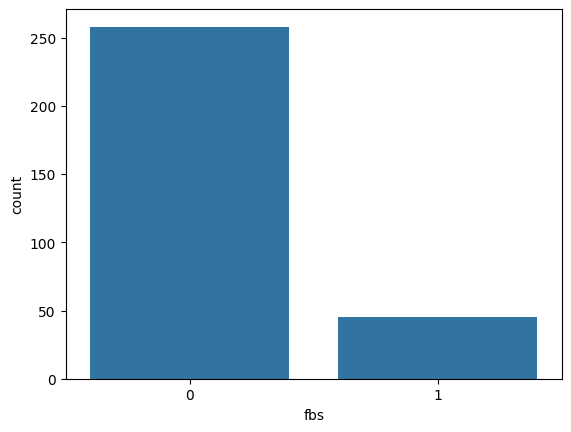

In [14]:
#checking chest pain types
sns.countplot(x='fbs',data=heart_data)

<Axes: xlabel='restecg', ylabel='count'>

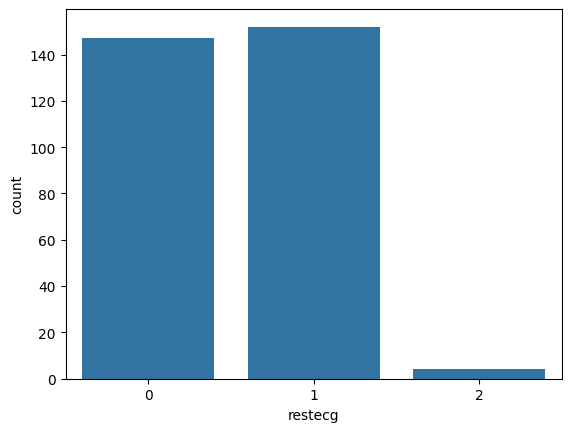

In [17]:
#checking chest pain types
sns.countplot(x='restecg',data=heart_data)

<ipython-input-18-90b6ab9e12f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['thalach'])


<Axes: xlabel='thalach', ylabel='Density'>

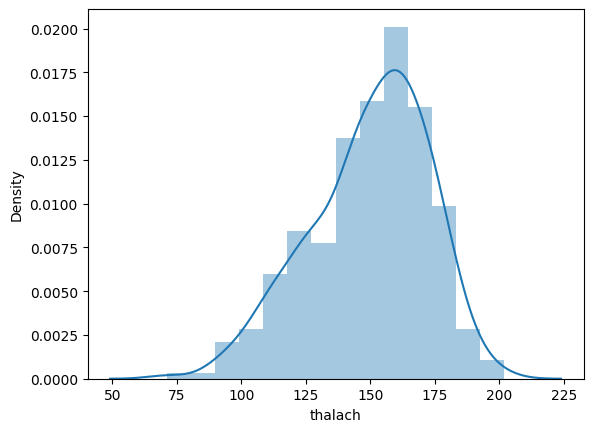

In [18]:

#distribution plot
sns.distplot(heart_data['thalach'])


<Axes: xlabel='exang', ylabel='count'>

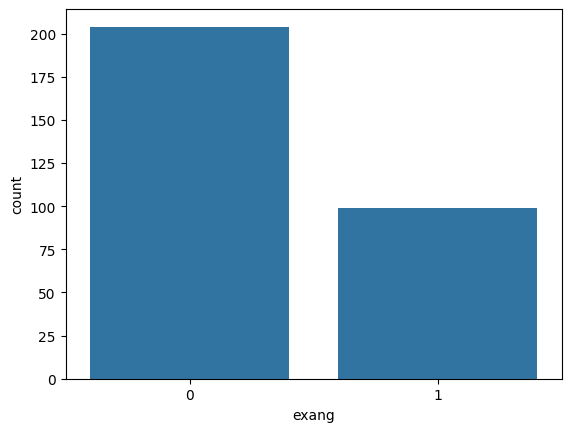

In [19]:

#checking chest pain types
sns.countplot(x='exang',data=heart_data)

<ipython-input-21-cfd44e494ff0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['oldpeak'])


<Axes: xlabel='oldpeak', ylabel='Density'>

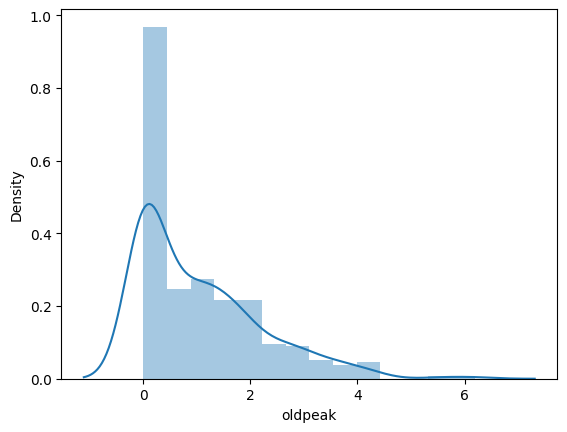

In [21]:
#oldpeak plot
sns.distplot(heart_data['oldpeak'])

<Axes: xlabel='slope', ylabel='count'>

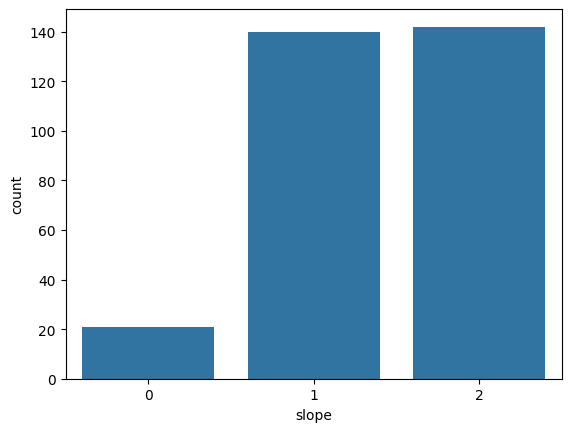

In [20]:
#pie chart
sns.countplot(x='slope',data=heart_data)

<Axes: xlabel='ca', ylabel='count'>

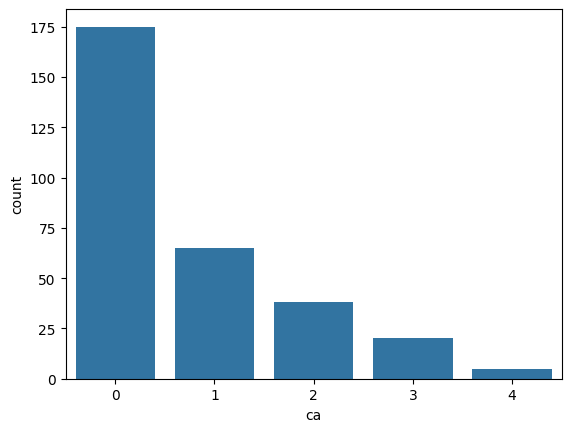

In [23]:
#plot for ca and thal
sns.countplot(x='ca',data=heart_data)

<Axes: xlabel='thal', ylabel='count'>

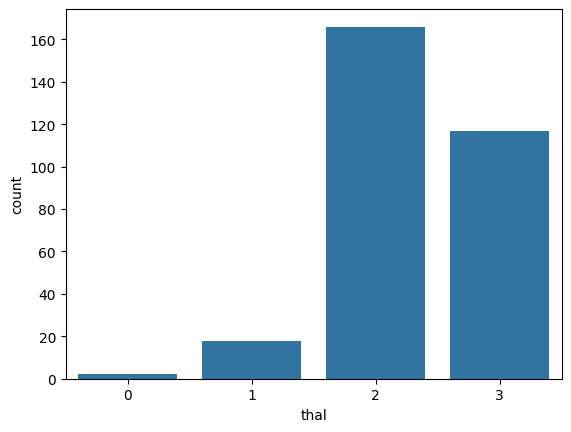

In [24]:
sns.countplot(x='thal',data=heart_data)

<Axes: >

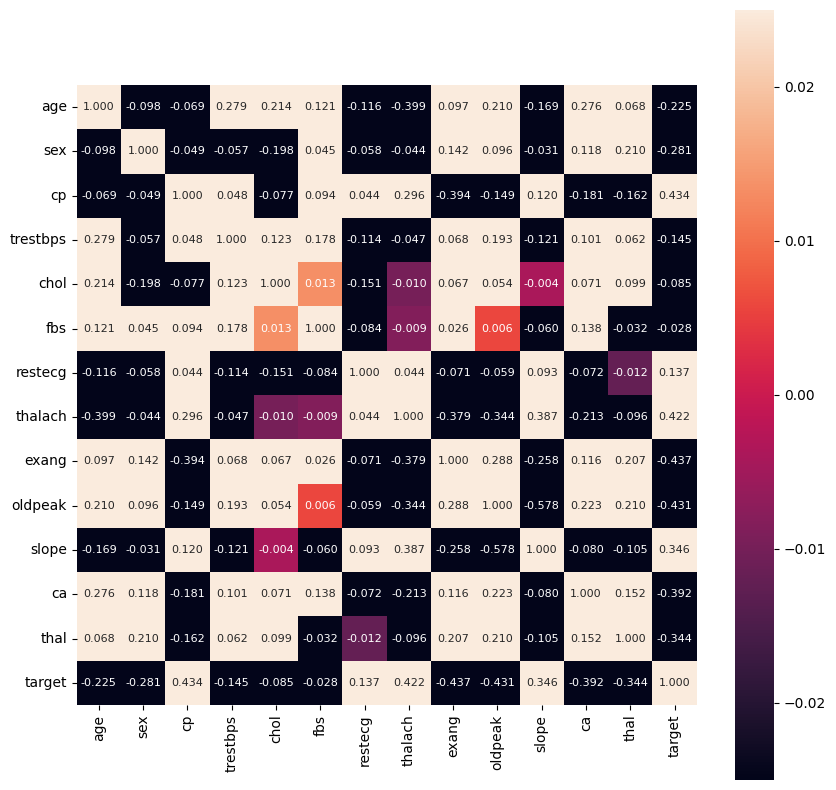

In [27]:
# constructing a heat map to understand correlation
correlation = heart_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8})

1 = Defective Heart

0 = Normal Heart

Splitting the features

In [28]:
X = heart_data.drop(['target'], axis=1)
Y = heart_data['target']

In [29]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

Train & Test Split

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , stratify = Y , random_state = 2)

In [31]:
X.shape , X_train.shape , X_test.shape

((303, 13), (242, 13), (61, 13))

Model Training

Logistics Regression

In [32]:
model = LogisticRegression()

In [33]:
#traing the model with X_train
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [34]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [35]:
print('Accuracy on Training data:', training_data_accuracy)

Accuracy on Training data: 0.8512396694214877


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [37]:
print('Accuracy on Training data:', testing_data_accuracy)

Accuracy on Training data: 0.819672131147541


Predictive System

In [38]:
input_data = (58,1,0,100,234,0,1,156,0,0.1,2,1,3)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if( prediction[0] == 0):
  print("The Person does not have any Heart Disease")
else:
  print("The Person have any Heart Disease")

[0]
The Person does not have any Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
import pickle
filename = "heart_disease_trained_model.sav"
pickle.dump(model , open(filename,'wb'))
#loading. the saved model
loaded_model = pickle.load(open('heart_disease_trained_model.sav','rb'))

In [40]:
input_data = (58,1,0,100,234,0,1,156,0,0.1,2,1,3)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print(prediction)

if( prediction[0] == 0):
  print("The Person doesnot have any Heart Disease")
else:
  print("The Person have any Heart Disease")

[0]
The Person doesnot have any Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
